In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

pd.set_option('display.max_columns', 50)


C:\Users\vivek\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("liar_dataset/train1.csv")

In [3]:
df.head()


,Json_id,Label,statement,subject_data,speaker,speaker_job_title,state_info,party_affiliation,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,Context(value/location)
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
df.describe()

,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000
mean,11.533210,13.286482,17.133718,16.434265,6.201407
std,18.973764,24.112936,35.846511,36.151688,16.128927
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000
75%,12.000000,12.000000,13.000000,11.000000,5.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000


In [5]:
# Let us get some basic stats #
print("Total Number of records : ", df.shape[0])
print("Number of uniques speakers : ", len(df.speaker.unique()))
print("Number of uniques speaker_job_title : ", len(df.speaker_job_title.unique()))
print("Number of uniques party_affiliation : ", len(df.party_affiliation.unique()))
print("Number of uniques state : ", len(df.state_info.unique()))


Total Number of records :  10240
Number of uniques speakers :  2911
Number of uniques speaker_job_title :  1185
Number of uniques party_affiliation :  24
Number of uniques state :  85


In [6]:
df.isnull().sum(axis=0)

Json_id                       0
Label                         0
statement                     0
subject_data                  2
speaker                       2
speaker_job_title          2897
state_info                 2208
party_affiliation             2
Barely_true_count             2
False_count                   2
Half_true_count               2
Mostly_true_count             2
Fire_counts                   2
Context(value/location)     102
dtype: int64

In [7]:
profile = pandas_profiling.ProfileReport(df)
profile

# Data Cleaning


In [8]:
df.drop('Json_id', axis = 1, inplace = True)


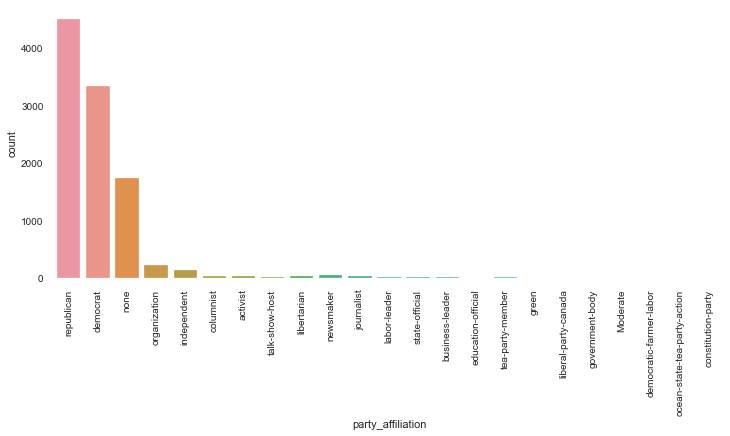

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='party_affiliation', data=df)
plt.xticks(rotation='vertical')
plt.show()

#based on result missing is replaced by repulication
df['party_affiliation'].fillna("republican", inplace=True)



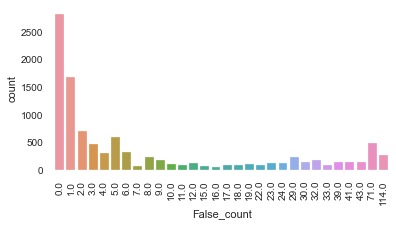

In [10]:
plt.figure(figsize=(6,3))
sns.countplot(x='False_count', data=df)
plt.xticks(rotation='vertical')
plt.show()


In [11]:
#Filling in missing values
df['speaker_job_title'].fillna("Others", inplace=True)
df['state_info'].fillna("Others", inplace=True)
df['Context(value/location)'].fillna("Others", inplace=True)
df['speaker'].fillna("none", inplace=True)
df['Barely_true_count'].fillna(0.0, inplace=True)
df['False_count'].fillna(0.0, inplace=True)
df['Half_true_count'].fillna(0.0, inplace=True)
df['Mostly_true_count'].fillna(0.0, inplace=True)
df['Fire_counts'].fillna(0.0, inplace=True)
df['subject_data'].fillna("none", inplace=True)


In [12]:
df.isnull().sum(axis=0)

Label                      0
statement                  0
subject_data               0
speaker                    0
speaker_job_title          0
state_info                 0
party_affiliation          0
Barely_true_count          0
False_count                0
Half_true_count            0
Mostly_true_count          0
Fire_counts                0
Context(value/location)    0
dtype: int64

In [13]:
df.shape

(10240, 13)

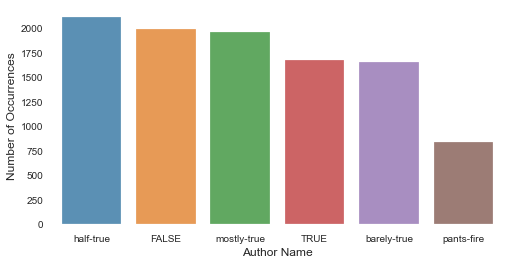

In [14]:
cnt_srs = df['Label'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Author Name', fontsize=12)
plt.show()

The dataset is balanced

In [15]:
#Labels=df['Label']
#from sklearn.preprocessing import OrdinalEncoder
#Labels = pd.DataFrame(OrdinalEncoder().fit_transform(Labels.to_numpy().reshape(-1,1)))
 #or

from sklearn import preprocessing
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(df.Label.values)
df["party"] = lbl_enc.fit_transform(df.party_affiliation.values)
df["state"] = lbl_enc.fit_transform(df.state_info.values)
df["speaker_l"] = lbl_enc.fit_transform(df.speaker.values)
df["Context"] = lbl_enc.fit_transform(df['Context(value/location)'])

df.drop('Label', axis = 1, inplace = True)
df.drop('party_affiliation', axis = 1, inplace = True)
df.drop('state_info', axis = 1, inplace = True)
df.drop('speaker', axis = 1, inplace = True)
df.drop('Context(value/location)', axis = 1, inplace = True)


In [16]:
df

,statement,subject_data,speaker_job_title,Barely_true_count,False_count,Half_true_count,Mostly_true_count,Fire_counts,party,state,speaker_l,Context
0,Says the Annies List political group supports ...,abortion,State representative,0.0,1.0,0.0,0.0,0.0,19,63,814,1314
1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",State delegate,0.0,0.0,1.0,1.0,0.0,5,70,2492,1154
2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,President,70.0,71.0,160.0,163.0,9.0,5,19,182,79
3,Health care reform legislation is likely to ma...,health-care,Others,7.0,19.0,3.0,5.0,44.0,16,50,272,1404
4,The economic turnaround started at the end of ...,"economy,jobs",Others,15.0,9.0,20.0,19.0,2.0,5,13,428,2878
...,...,...,...,...,...,...,...,...,...,...,...,...
10235,There are a larger number of shark attacks in ...,"animals,elections",Others,0.0,1.0,1.0,1.0,0.0,16,13,12,3877
10236,Democrats have now become the party of the [At...,elections,Others,0.0,0.0,0.0,1.0,0.0,19,15,36,2756
10237,Says an alternative to Social Security that op...,"retirement,social-security",Others,4.0,11.0,5.0,3.0,3.0,19,15,1108,497
10238,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",Others,3.0,1.0,3.0,0.0,0.0,5,13,1243,2266


In [17]:
y

array([0, 3, 4, ..., 3, 0, 5])

In [18]:
#merging state and job_title to one
import re
def merge(temp):
    temp = temp.lower() # lowercase text
    temp = re.sub(' ','_', temp)
    return temp
df['speaker_job_title'] = df['speaker_job_title'].apply(merge)
#df['subject_data'] = df['subject_data'].apply(merge)


In [19]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

#df = df.reset_index(drop=True)

def clean_text(temp):
    temp = temp.lower() # lowercase text
    temp = re.sub('[^a-zA-Z]',' ', temp)
    temp=temp.split( )
    temp= [stemmer.stem(word) for word in temp if word not in set(stopwords.words('english'))]
    temp= ' '.join(temp)
    return temp
df['statement'] = df['statement'].apply(clean_text)
df['subject_data'] = df['subject_data'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
#Creating new dataframe fro meta features
df_meta = pd.DataFrame(df, columns = ['Barely_true_count', 'False_count','Half_true_count','Mostly_true_count','Fire_counts','party','state','speaker_l','Context'])

In [22]:
df['combined']= df.statement + ' '+df.subject_data 
df['combined'][0]

'say anni list polit group support third trimest abort demand abort'

## Glove

In [23]:
MAX_NB_WORDS = 100000    # max no. of words for tokenizer
MAX_SEQUENCE_LENGTH = 100 # max length of each entry (sentence), including padding
VALIDATION_SPLIT = 0.2   # data for validation (not used in training)
EMBEDDING_DIM = 50      # embedding dimensions for word vectors (word2vec/GloVe)
GLOVE_DIR = "GLOVE/glove.6B.50d.txt"

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(df.combined)

sequences = tokenizer.texts_to_sequences(df.combined)
word_index = tokenizer.word_index
print('Vocabulary size:', len(word_index))


C:\Users\vivek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\vivek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\vivek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\vivek\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Vocabulary size: 7699


In [25]:
word_index

{'state': 1,
 'say': 2,
 'tax': 3,
 'health': 4,
 'budget': 5,
 'job': 6,
 'care': 7,
 'economi': 8,
 'year': 9,
 'percent': 10,
 'feder': 11,
 'educ': 12,
 'govern': 13,
 'obama': 14,
 'vote': 15,
 'elect': 16,
 'candid': 17,
 'immigr': 18,
 'presid': 19,
 'biographi': 20,
 'million': 21,
 'public': 22,
 'peopl': 23,
 'crime': 24,
 'polici': 25,
 'histori': 26,
 'would': 27,
 'foreign': 28,
 'new': 29,
 'gun': 30,
 'one': 31,
 'machin': 32,
 'messag': 33,
 'american': 34,
 'u': 35,
 'citi': 36,
 'bill': 37,
 'energi': 38,
 'financ': 39,
 'time': 40,
 'regul': 41,
 'secur': 42,
 'worker': 43,
 'campaign': 44,
 'countri': 45,
 'billion': 46,
 'legal': 47,
 'cut': 48,
 'nation': 49,
 'issu': 50,
 'women': 51,
 'militari': 52,
 'abort': 53,
 'rate': 54,
 'texa': 55,
 'plan': 56,
 'right': 57,
 'republican': 58,
 'medicar': 59,
 'incom': 60,
 'congress': 61,
 'everi': 62,
 'law': 63,
 'said': 64,
 'pay': 65,
 'barack': 66,
 'sinc': 67,
 'school': 68,
 'support': 69,
 'environ': 70,
 'spend

In [26]:
sequences[0]

[2, 4681, 734, 390, 399, 69, 288, 3599, 53, 996, 53]

In [48]:
#add other features to sequences
sequences[1]

[823,
 870,
 308,
 308,
 735,
 194,
 172,
 308,
 791,
 19,
 281,
 524,
 121,
 129,
 38,
 26,
 6,
 88]

In [28]:
data = pad_sequences(sequences , padding = 'post', maxlen = MAX_SEQUENCE_LENGTH)

In [50]:
data[10]

array([ 104,   40,   26,  761,   49,  792,   15, 1467, 1218, 1159,   15,
       1467,   16,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [30]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

Shape of data tensor: (10240, 100)
Shape of label tensor: (10240,)


In [31]:

## train test split
from sklearn.model_selection import train_test_split
steps = 25000
X_train,X_test,Y_train,Y_test = train_test_split(data, y, test_size=0.1,shuffle = False)

print('Tokenized sentences: \n', X_train[10])
print('One hot label: \n', Y_train[10])


Tokenized sentences: 
 [ 104   40   26  761   49  792   15 1467 1218 1159   15 1467   16    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
One hot label: 
 4


In [32]:
embeddings_index = {}
f = open(GLOVE_DIR,encoding="utf8")
print('Loading GloVe from:', GLOVE_DIR,'...', end='')
for line in f:
    values = line.split()
    word = values[0]
    embeddings_index[word] = np.asarray(values[1:], dtype='float32')
f.close()
print("Done.\n Proceeding with Embedding Matrix...", end="")

embedding_matrix = np.random.random((len(word_index) + 1, EMBEDDING_DIM))
for key, value in word_index.items():
    embedding_vector = embeddings_index.get(key)  # will get the dimension value of key like "the"
    if embedding_vector is not None:
        embedding_matrix[value] = embedding_vector
print(" Completed!")

Loading GloVe from: GLOVE/glove.6B.50d.txt ...Done.
 Proceeding with Embedding Matrix... Completed!


In [33]:
print(embedding_matrix.shape)

(7700, 50)


In [34]:
embedding_matrix[0]

array([0.56468327, 0.08672984, 0.03253791, 0.66968398, 0.38215525,
       0.86914213, 0.87282616, 0.77275539, 0.73856682, 0.04826022,
       0.59209929, 0.5038052 , 0.12769662, 0.28734147, 0.75435659,
       0.09332852, 0.10596989, 0.38382132, 0.44786975, 0.53200379,
       0.70832199, 0.7470518 , 0.00693268, 0.76644277, 0.58390025,
       0.6032241 , 0.93780619, 0.28008286, 0.08621484, 0.21872297,
       0.21603149, 0.56958348, 0.96378616, 0.89337603, 0.33302299,
       0.01064673, 0.4648209 , 0.12013299, 0.71214581, 0.77385664,
       0.5043582 , 0.09900197, 0.43169151, 0.46496888, 0.41704977,
       0.46590049, 0.7284578 , 0.97684007, 0.76091184, 0.70355069])

In [62]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Input, CuDNNLSTM, Dense, Dropout, LSTM

from keras.models import Model

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [78]:
'''
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32', name='main_input')
embedding_layer = Embedding(len(word_index) + 1,
                           EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False,
                           name = 'embeddings')
x_embedded_sequences = embedding_layer(sequence_input)
'''

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [85]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#model.add(Embedding(vocab_size,EMBEDDING_DIM,input_length=MAX_SEQUENCE_LENGTH)) ---Without Glove

vocab_size=len(word_index) + 1

#defining Model
from keras.models import Sequential

model = Sequential()
e=Embedding(vocab_size,EMBEDDING_DIM,weights =[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable = False)
model.add(e)
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=2))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(20, activation='softmax'))
model.add(Dense(1, activation='softmax'))

#Compliling Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

#Summarize model
print(model.summary())

#Fit the Model
#history = model.fit(X_train,Y_train,epochs = 5,batch_size=256,validation_split=0.2)
history = model.fit(X_train, Y_train, epochs=3, batch_size=10,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
evaluate = model1.evaluate(X_test, Y_test)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 100, 50)           385000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 32)           4832      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 32)            0         
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 50, 32)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_20 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [89]:
evaluate = model.evaluate(X_test, Y_test)

1024/1024 [==============================] - 0s 470us/step


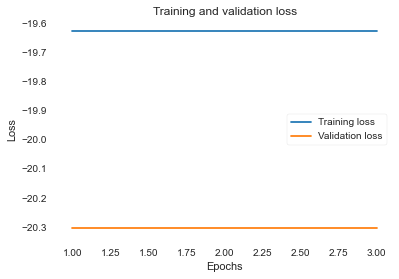

In [90]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show();

[0.16421509, 0.16421509, 0.16421509]


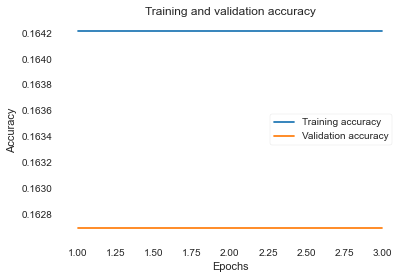

In [91]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print(accuracy)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show();